In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, normalize
from sklearn.datasets import load_diabetes, load_breast_cancer


In [2]:

# ---------------------------
# 1. Titanic Dataset
# ---------------------------
print("\n--- Titanic Dataset ---")
titanic = sns.load_dataset("titanic")   # Titanic dataset from seaborn

print("Original Titanic shape:", titanic.shape)
print(titanic.head())



--- Titanic Dataset ---
Original Titanic shape: (891, 15)
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [5]:

# Handle Missing Data
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])

if 'deck' in titanic.columns:
    titanic = titanic.drop(columns=['deck'])


In [6]:
# Encode categorical data
label_enc = LabelEncoder()
titanic['sex'] = label_enc.fit_transform(titanic['sex'])
titanic['embarked'] = label_enc.fit_transform(titanic['embarked'])
titanic['class'] = label_enc.fit_transform(titanic['class'])

In [7]:
# Scale numeric features
scaler = StandardScaler()
numeric_cols = titanic.select_dtypes(include=[np.number]).columns
titanic[numeric_cols] = scaler.fit_transform(titanic[numeric_cols])

In [8]:
# Normalize numeric features
titanic[numeric_cols] = normalize(titanic[numeric_cols])

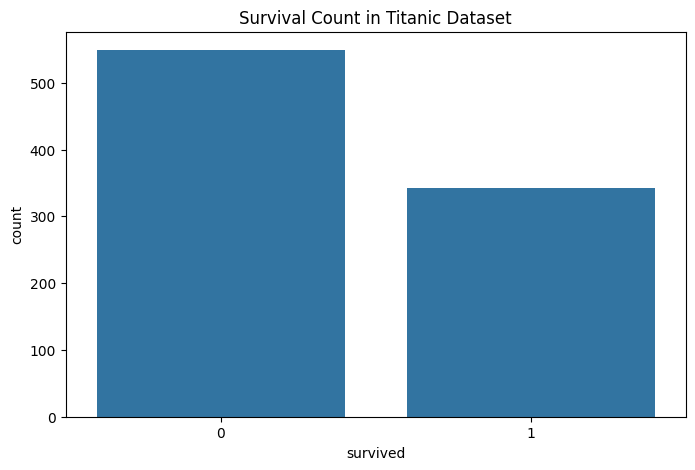

In [9]:
# Visualization
plt.figure(figsize=(8,5))
sns.countplot(x="survived", data=sns.load_dataset("titanic"))
plt.title("Survival Count in Titanic Dataset")
plt.show()

In [10]:
# ---------------------------
# 2. Diabetes Dataset (sklearn)
# ---------------------------
print("\n--- Diabetes Dataset ---")
diabetes = load_diabetes(as_frame=True)
df_diabetes = diabetes.frame

print("Original Diabetes shape:", df_diabetes.shape)
print(df_diabetes.head())


--- Diabetes Dataset ---
Original Diabetes shape: (442, 11)
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [11]:
# a. Handle Missing Data
print("Missing values in Diabetes:", df_diabetes.isnull().sum().sum())  # should be 0


Missing values in Diabetes: 0


In [12]:
# c. Scale features
scaler = StandardScaler()
X_diabetes = scaler.fit_transform(df_diabetes.drop(columns=["target"]))


In [13]:
# d. Normalize
X_diabetes_norm = normalize(X_diabetes)


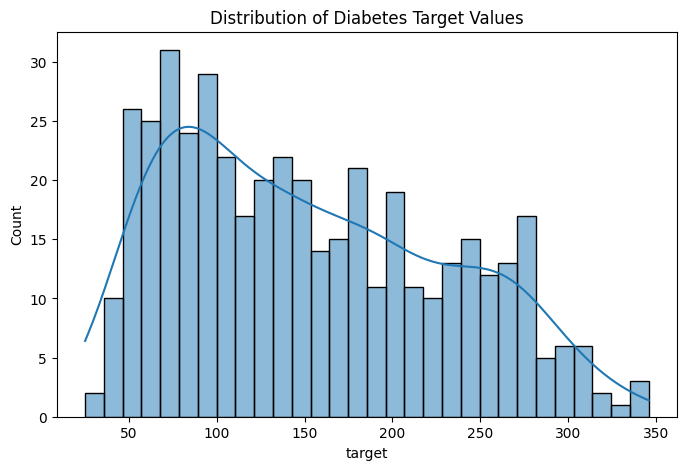

In [14]:
# Visualization
plt.figure(figsize=(8,5))
sns.histplot(df_diabetes["target"], bins=30, kde=True)
plt.title("Distribution of Diabetes Target Values")
plt.show()

In [15]:

# ---------------------------
# 3. Breast Cancer Dataset (sklearn)
# ---------------------------
print("\n--- Breast Cancer Dataset ---")
cancer = load_breast_cancer(as_frame=True)
df_cancer = cancer.frame

print("Original Cancer shape:", df_cancer.shape)
print(df_cancer.head())


--- Breast Cancer Dataset ---
Original Cancer shape: (569, 31)
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  .

In [16]:
# a. Handle Missing Data
print("Missing values in Cancer:", df_cancer.isnull().sum().sum())  # should be 0


Missing values in Cancer: 0


In [17]:
# c. Scale features
scaler = StandardScaler()
X_cancer = scaler.fit_transform(df_cancer.drop(columns=["target"]))


In [18]:
# d. Normalize
X_cancer_norm = normalize(X_cancer)


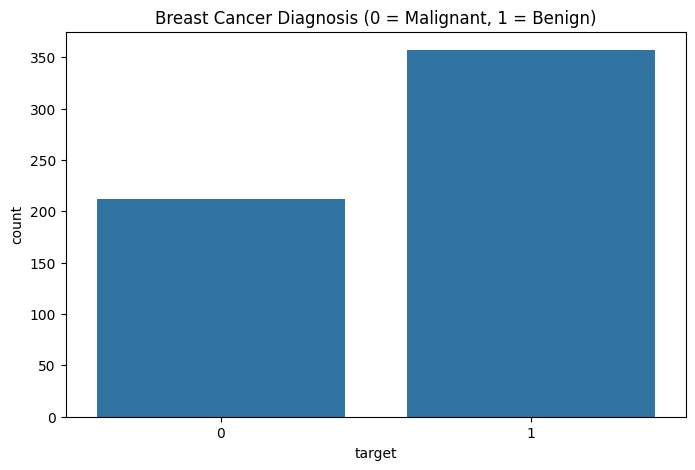

In [19]:
# Visualization
plt.figure(figsize=(8,5))
sns.countplot(x=df_cancer["target"])
plt.title("Breast Cancer Diagnosis (0 = Malignant, 1 = Benign)")
plt.show()
